# Determining action from robot motion sensing data

In [128]:
%matplotlib inline

import json
import ast
import os
from pprint import pprint
import matplotlib.pyplot as plt
from pylab import *
from IPython.display import display, Markdown, Latex


measurements = ["xGyro","yGyro","xAccl","xMag","zAccl","yAccl","zGyro","yMag","zMag"]

types = ["Driving", "Walking", "Jumping", "Standing", "Static"]

def getMDict(folder):
    fileDict = {}
    for file in os.listdir(folder):
        filepath = os.path.join(folder, file)
        with open(filepath) as f:
            fileText = f.read()
        fileText = ast.literal_eval(fileText)

        mDict = {}
        for y in measurements:
            m = []
            for z in fileText['seq']:
                m.append(z['data'][y])
            mDict[y] = m
        fileDict[file] = mDict

    return fileDict

In [129]:
def getTimes(file):
    filepath = os.path.join(folder, file)
    with open(filepath) as f:
        fileText = f.read()
    fileText = ast.literal_eval(fileText)

    times = []
    time0 = fileText['seq'][0]['time']
    for y in fileText['seq']:
        times.append((y['time'] - time0))
    return times;

In [147]:
def getFreq(xs, ys):
    x = np.array(xs)
    y = np.array(ys)
    x = x[:len(x)//2]
    y = y[:len(y)//2]
    yf = fft(y)
#     def reciprocal(xi): return 1.0/xi
#     xf = map(reciprocal, x)
    return x, yf

In [190]:
def showPlot(file, mDict): 
    times = getTimes(file)
    i=1
    plt.figure(1).set_size_inches(24,48)
    for m in mDict:
        plt.subplot(len(measurements),2,i)
        i += 1   
        plt.plot(times,mDict[m],label=m)
        plt.xlabel('Time (s)')
        plt.title(file.split('.')[0] + ": "+ m)
        plt.grid(True)
        plt.yticks([])
            
        plt.subplot(len(measurements),2,i)
        i += 1 
        
        xf, yf = getFreq(times, mDict[m])
        
        plt.plot(xf, np.abs(yf))
        plt.grid()
        title("freq analyisis for " + file.split('.')[0] + ": "+ m)
        plt.yticks([])
        plt.xlabel('Time (s)')
    plt.tight_layout()
    show()

In [191]:
folder = "./logs"

fileDict = getMDict(folder)

## activity-team2-Driving-0

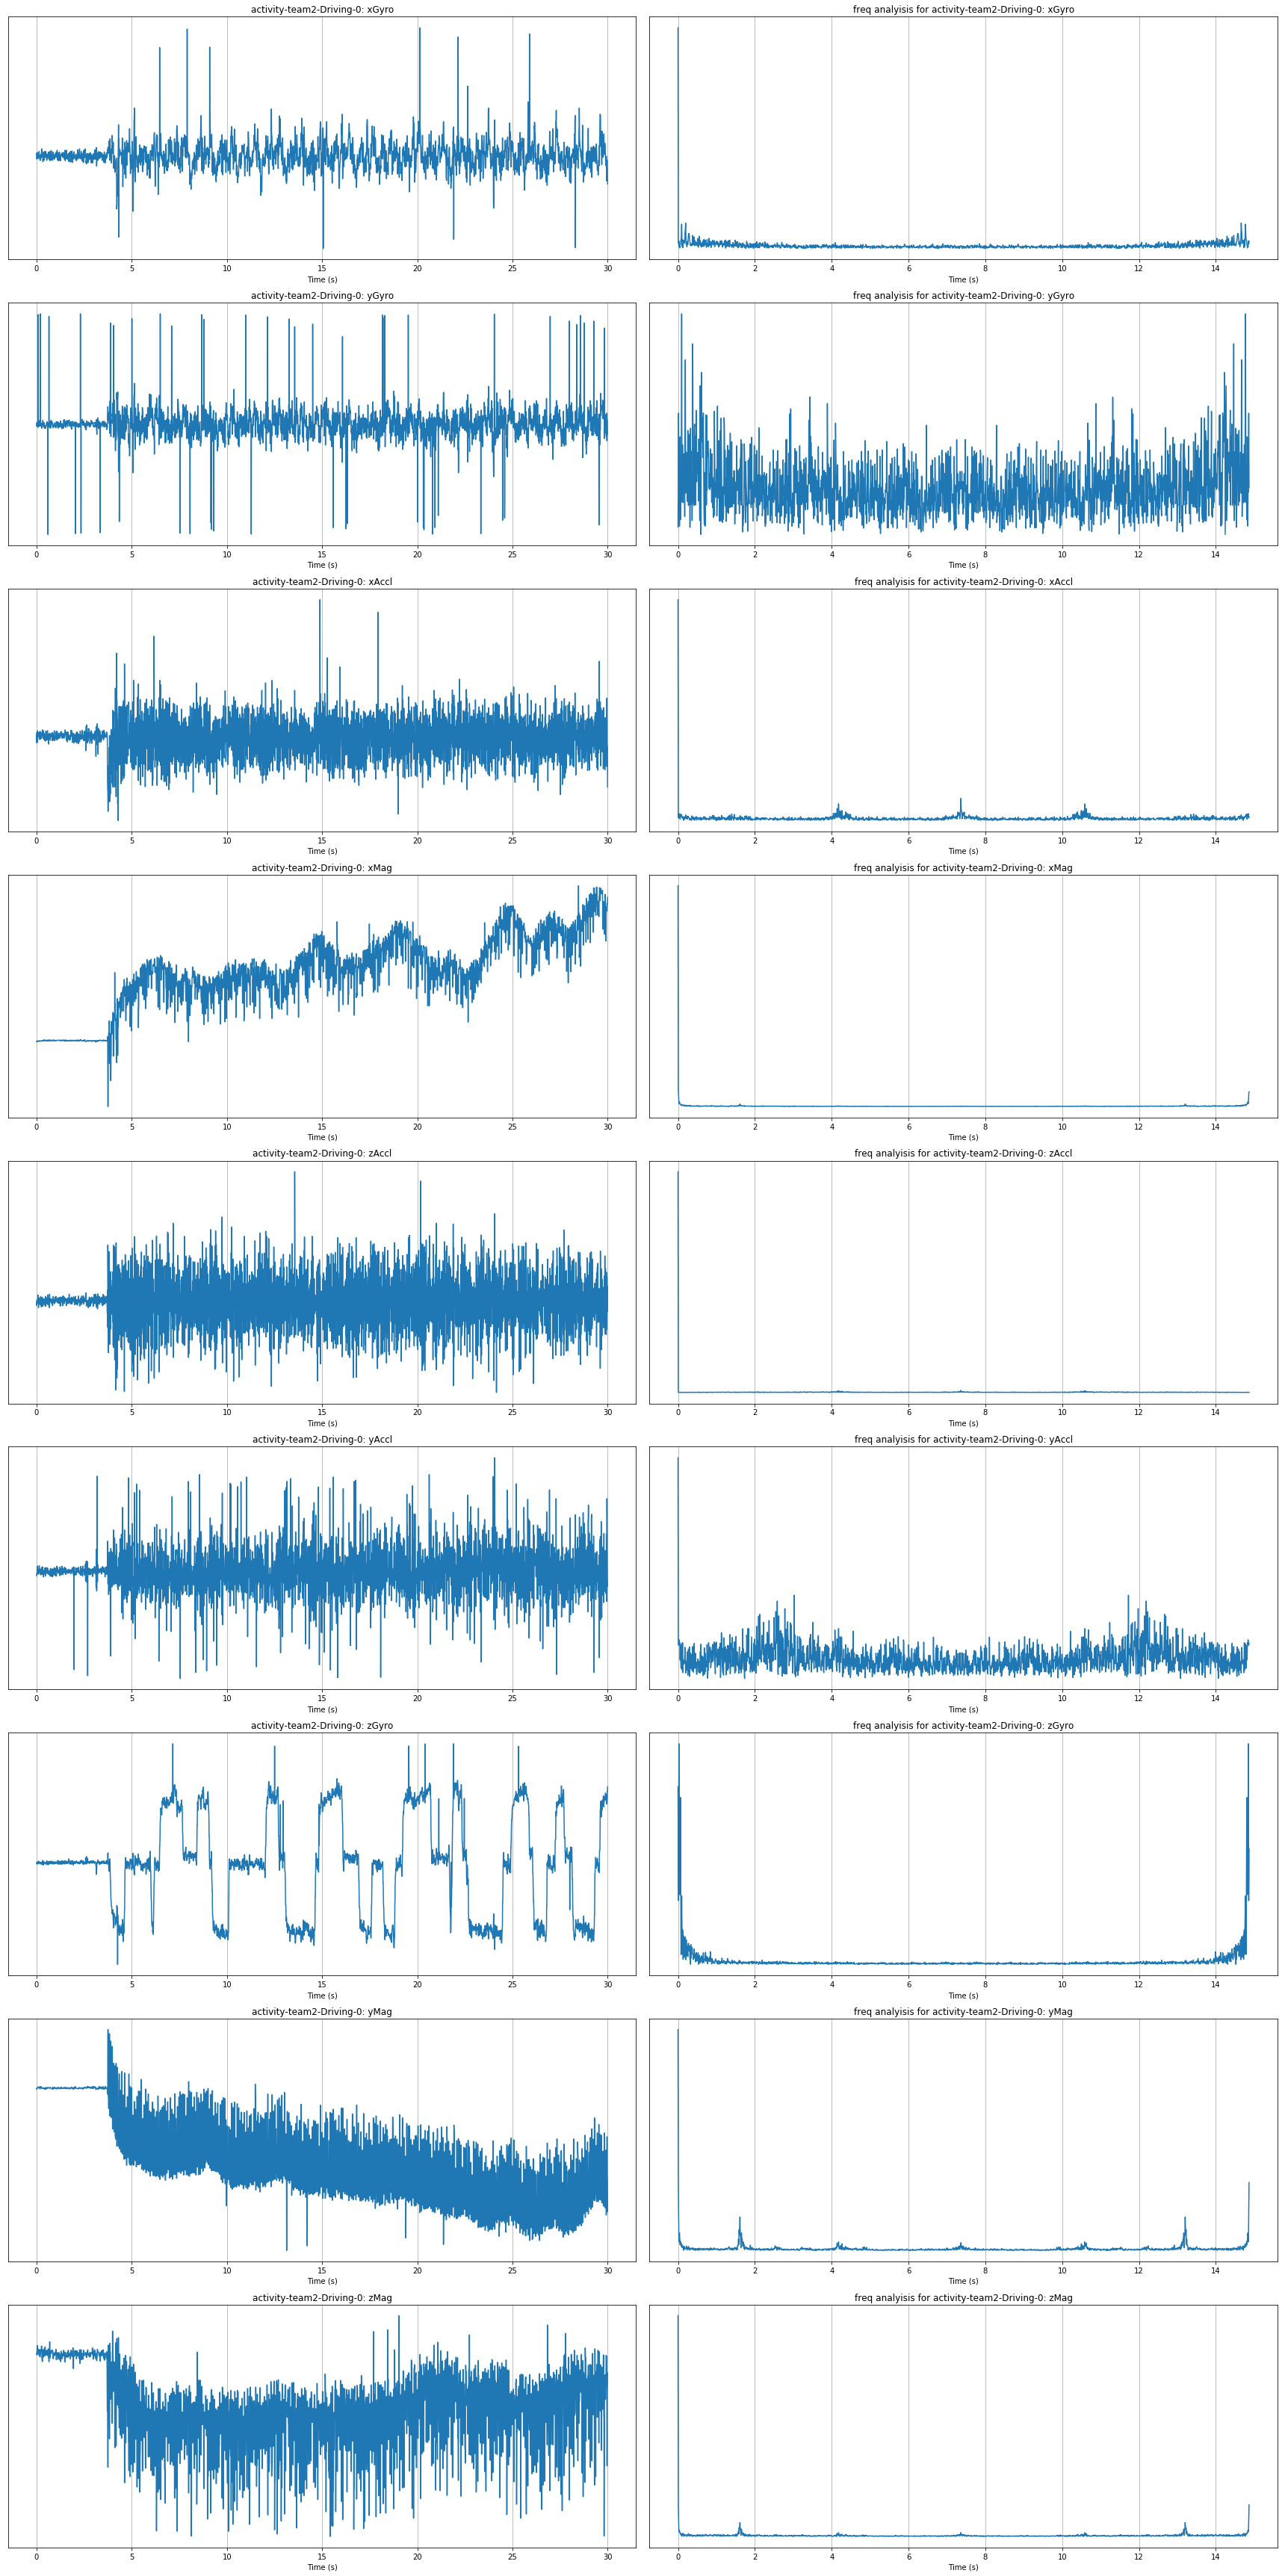

## activity-team2-Jumping-0

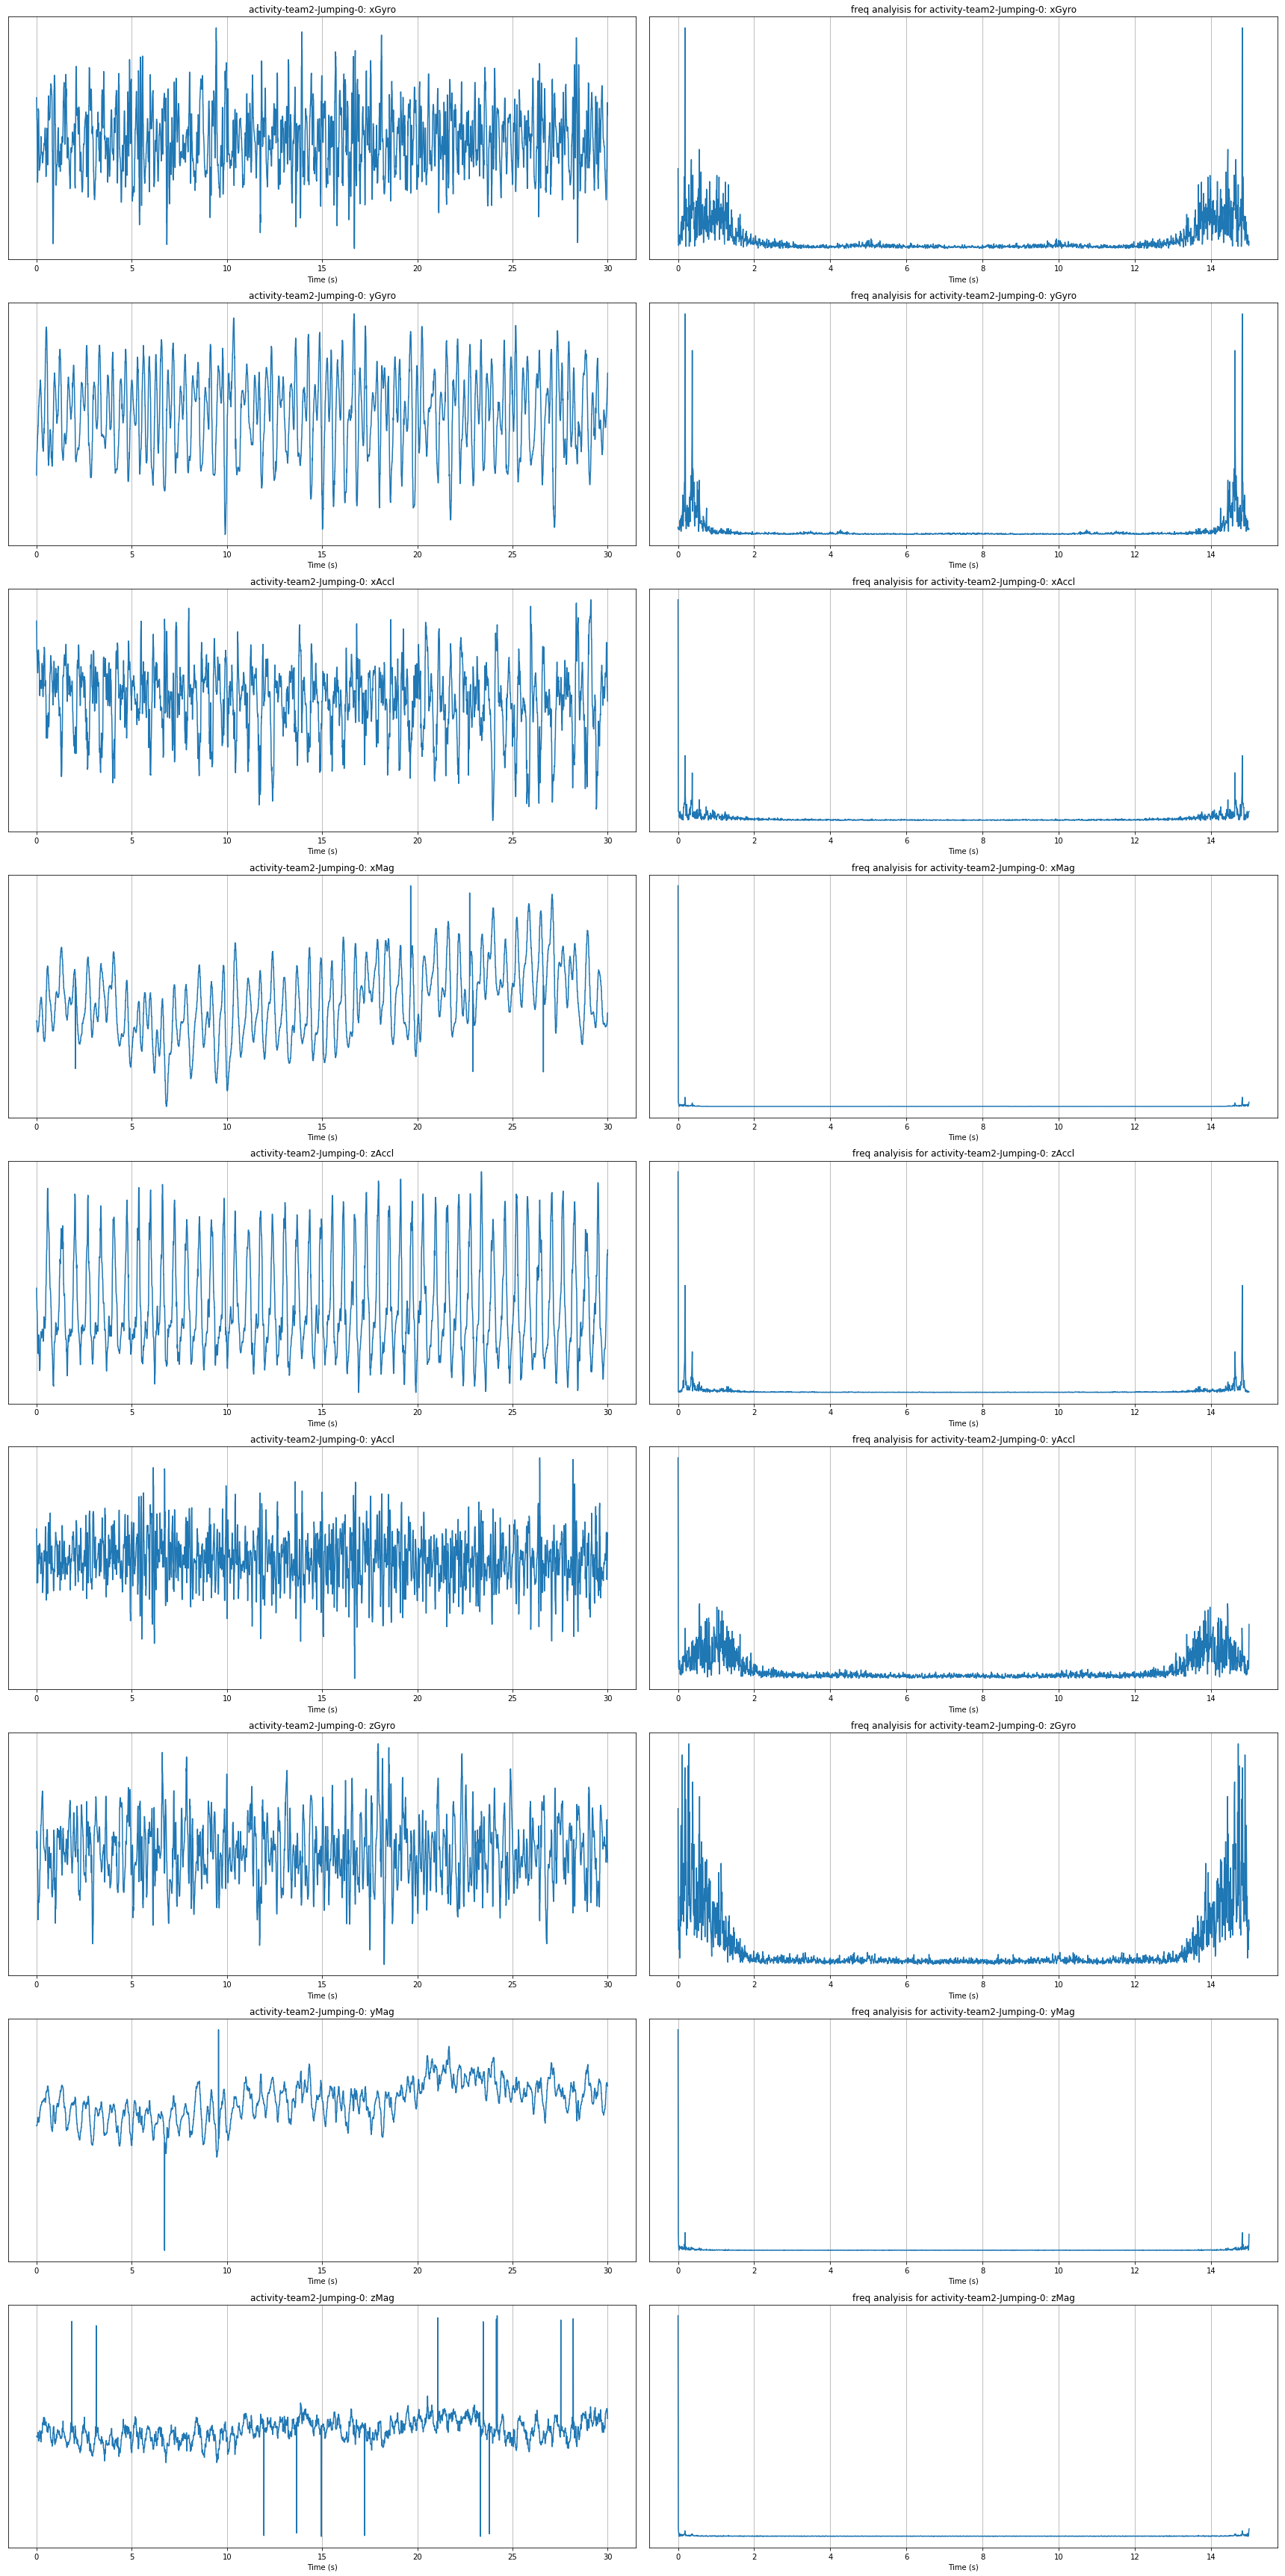

## activity-team2-Static-0

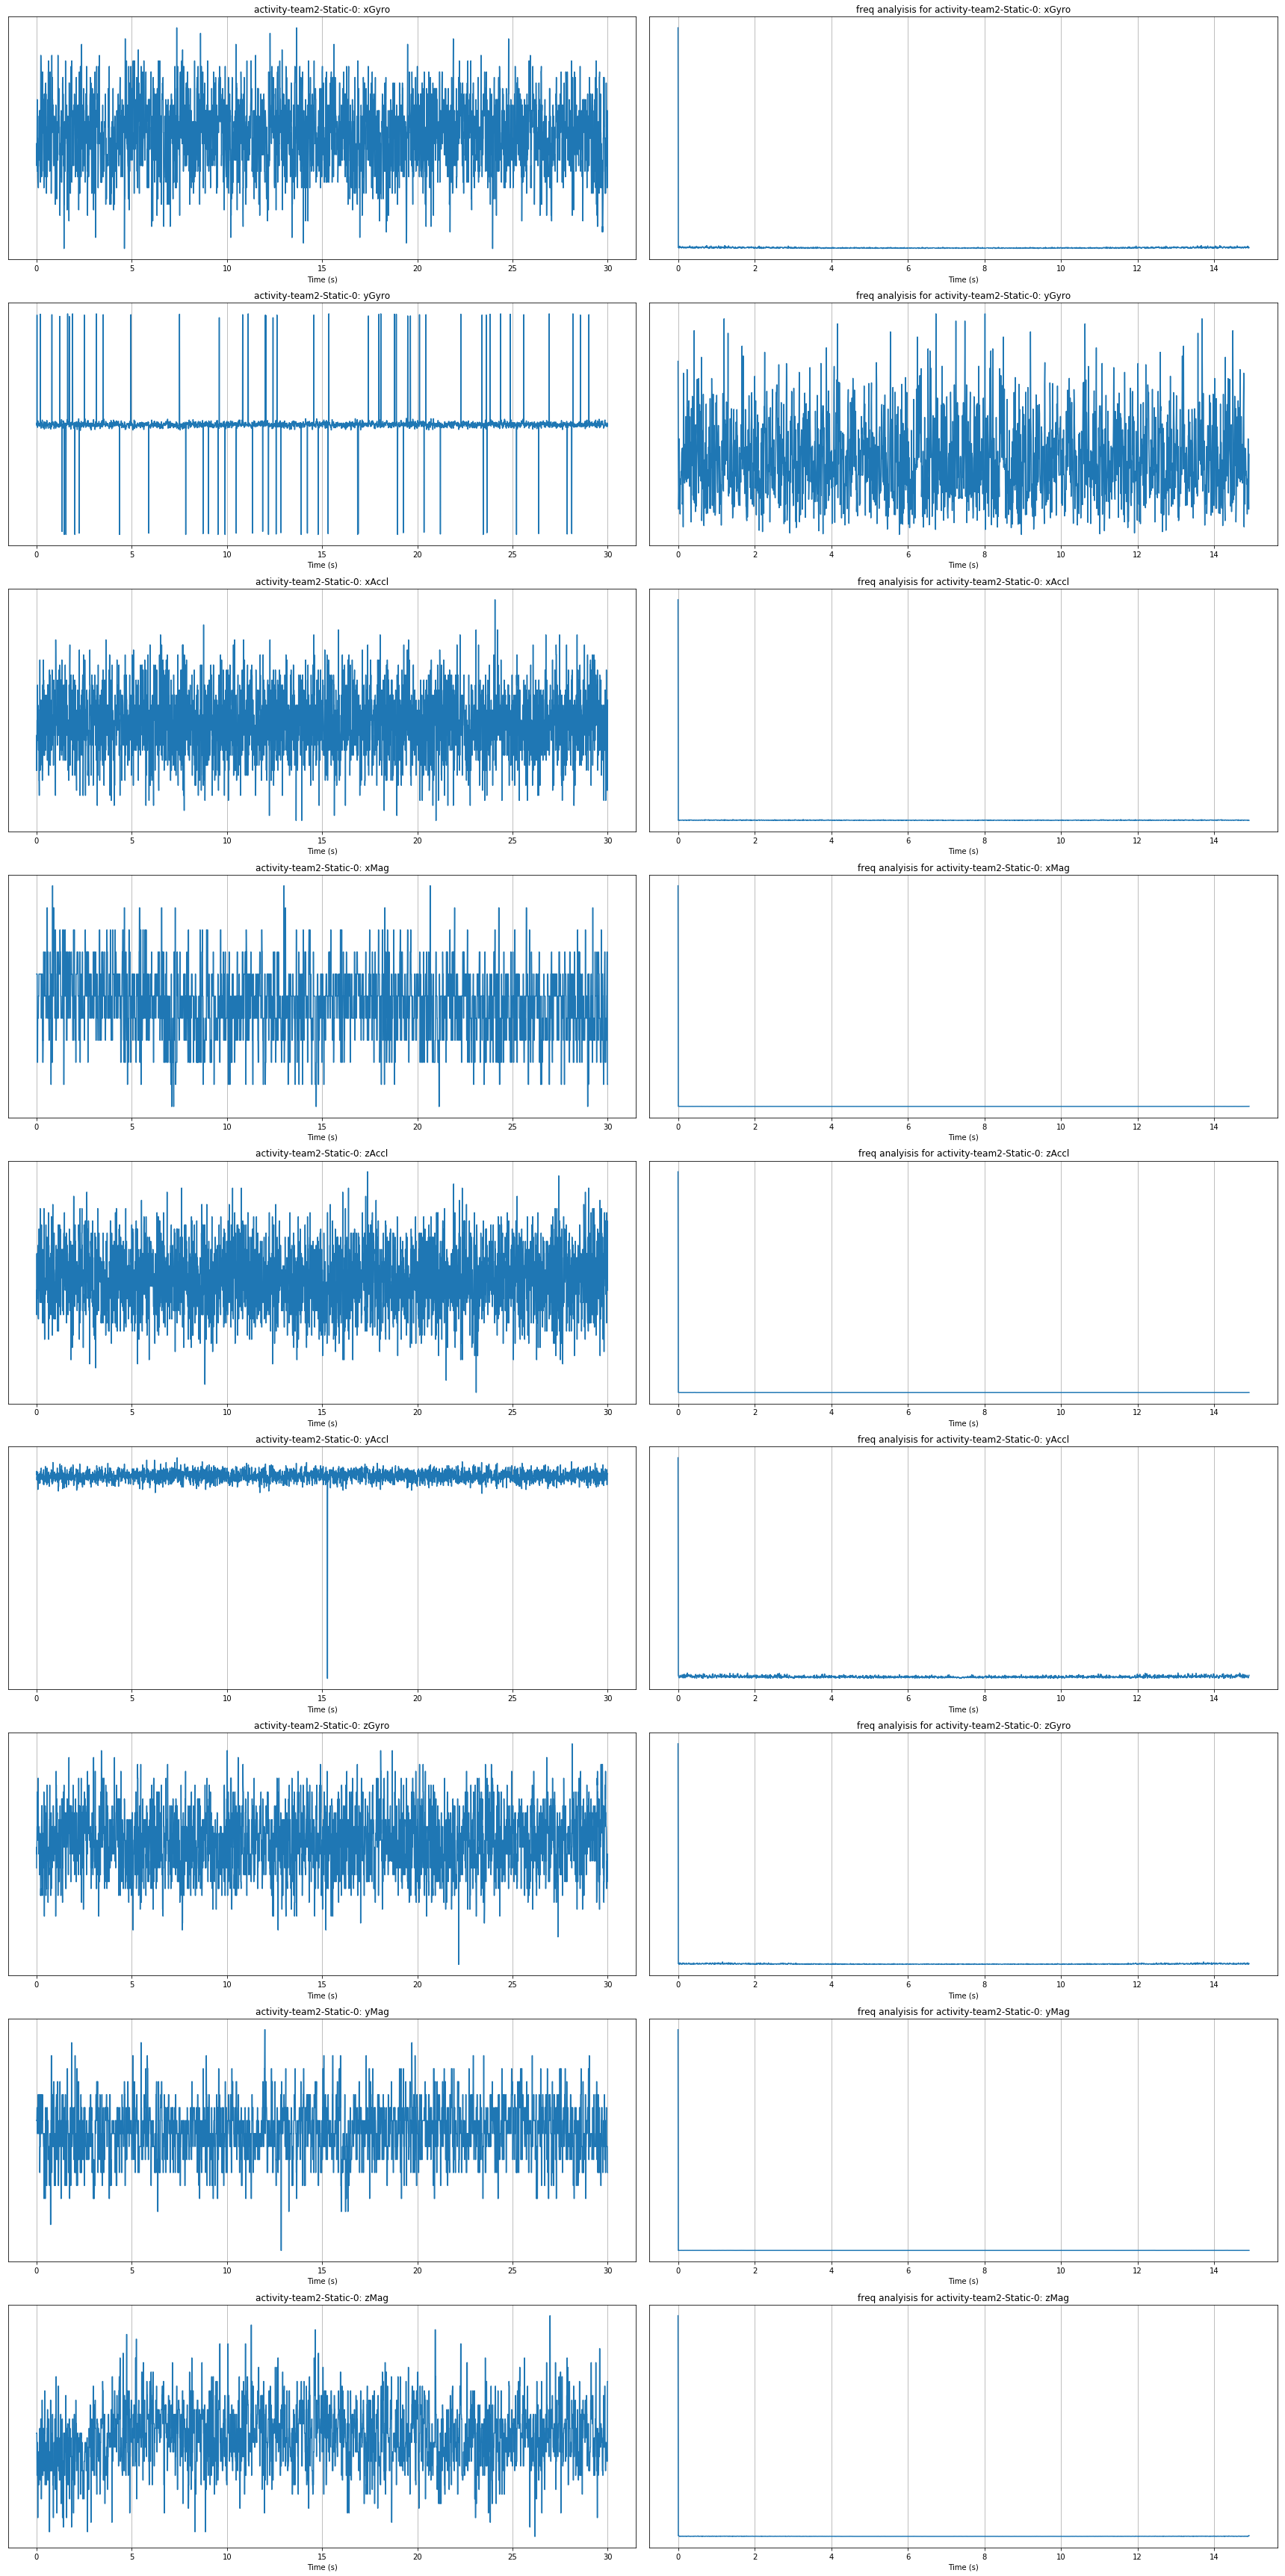

## activity-team2-Driving-1

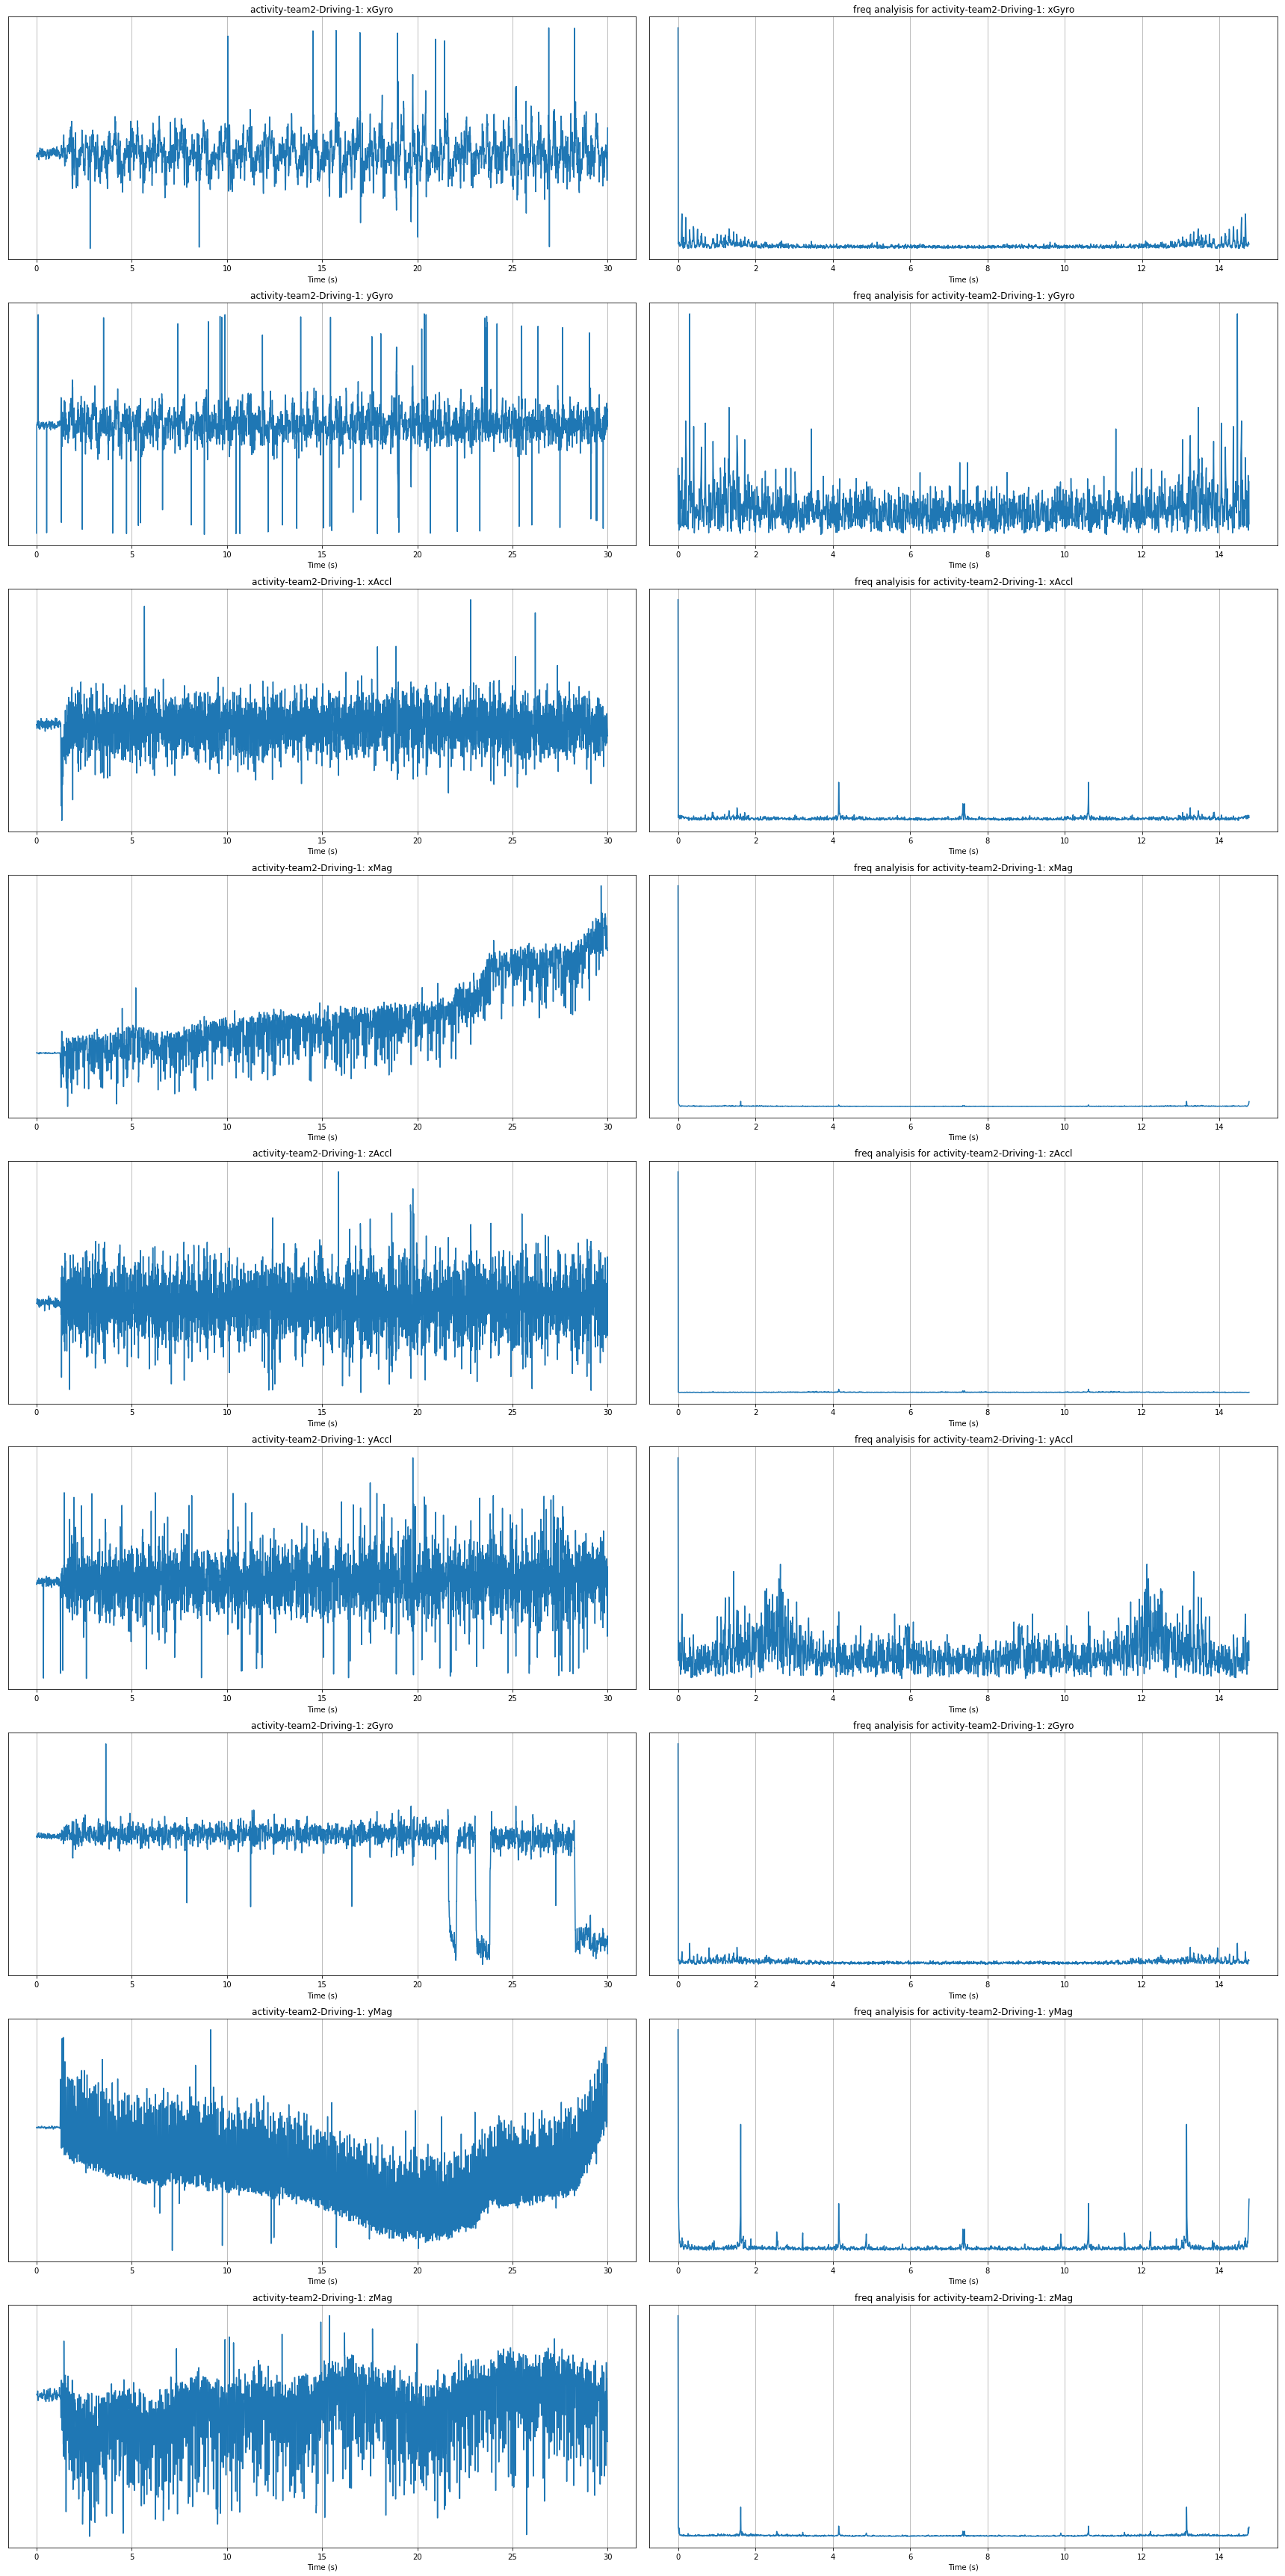

## activity-team2-Standing-0

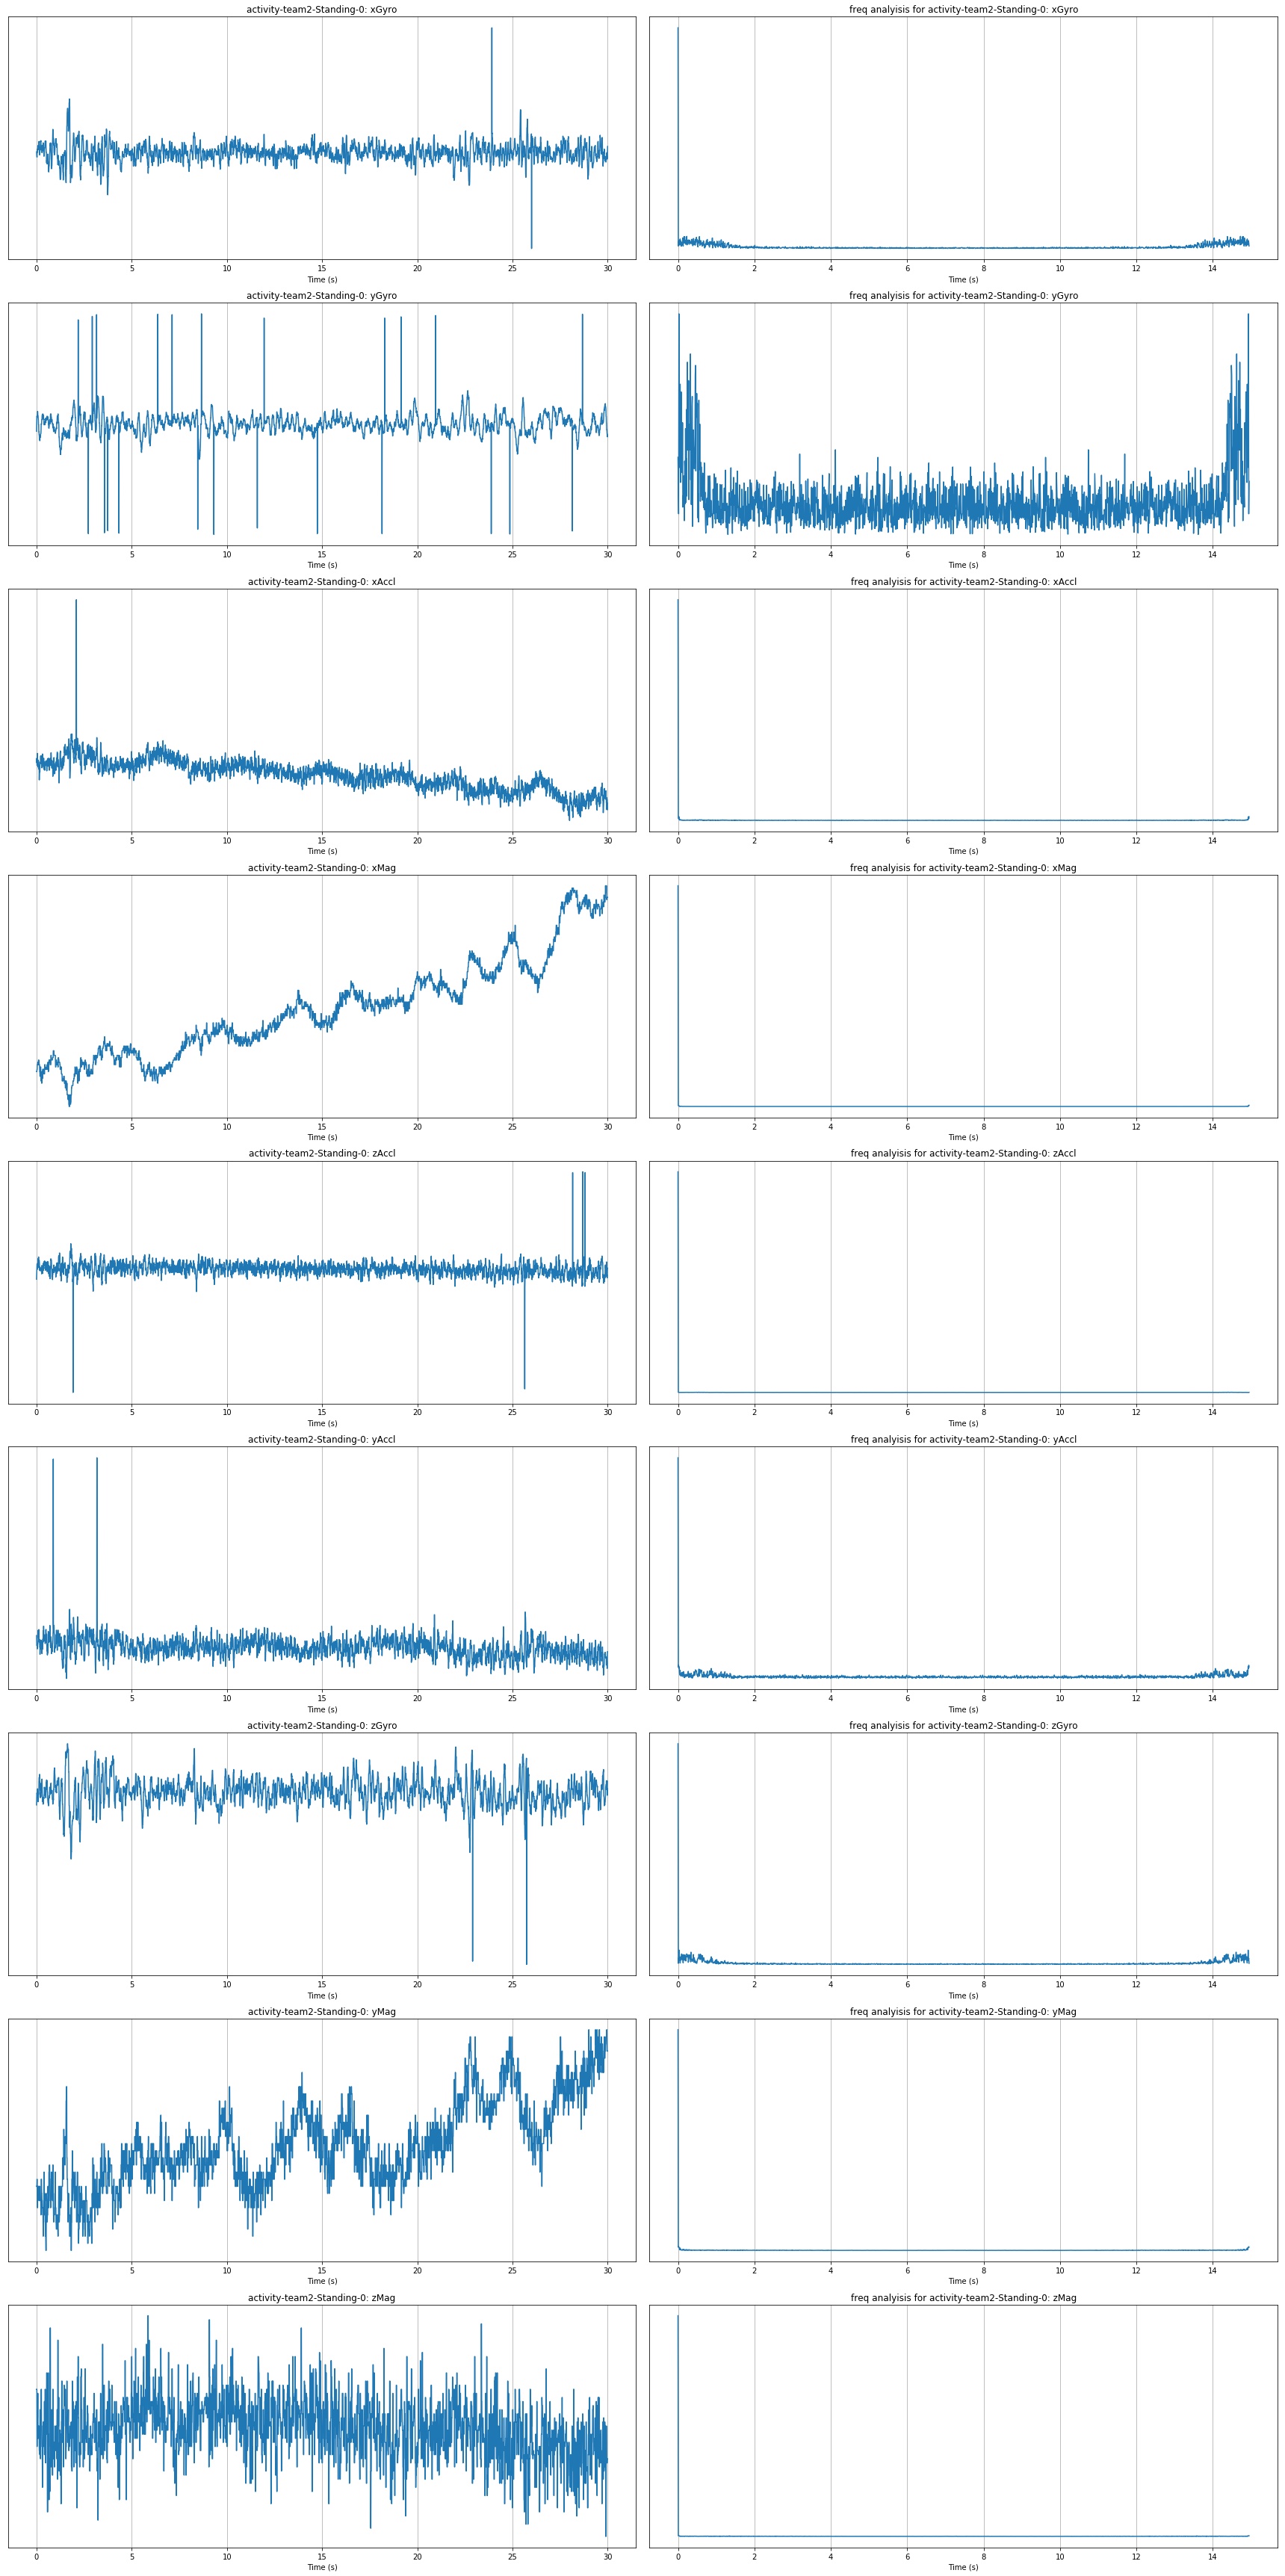

## activity-team2-Static-1

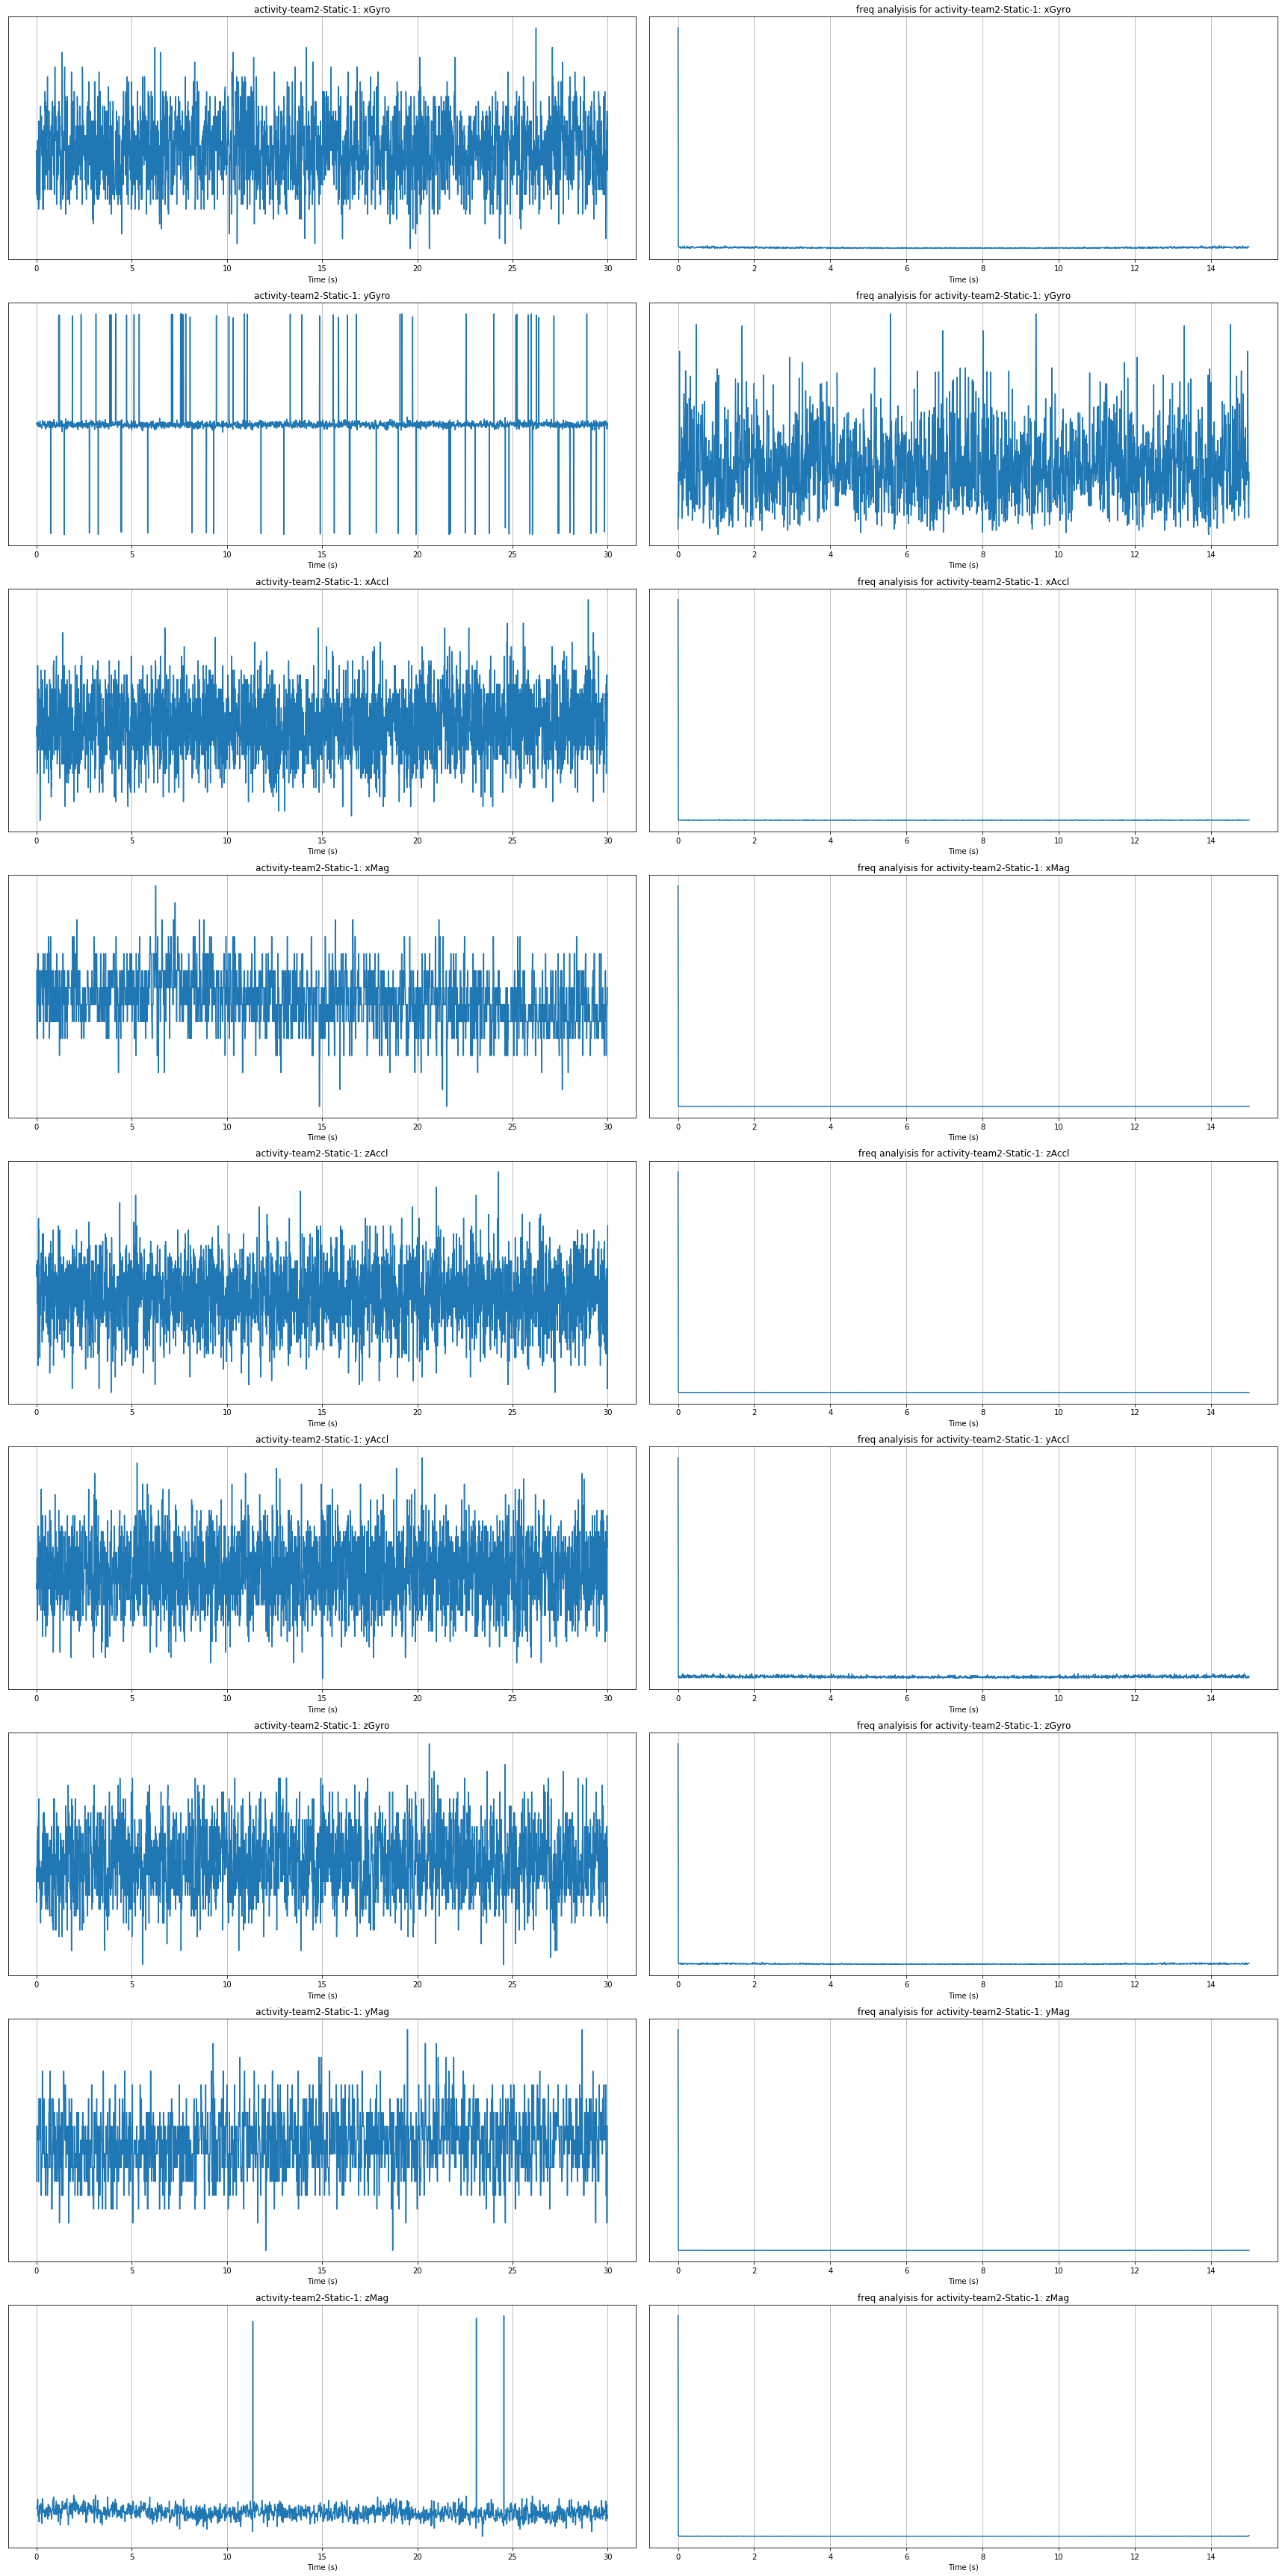

## activity-team2-Jumping-1

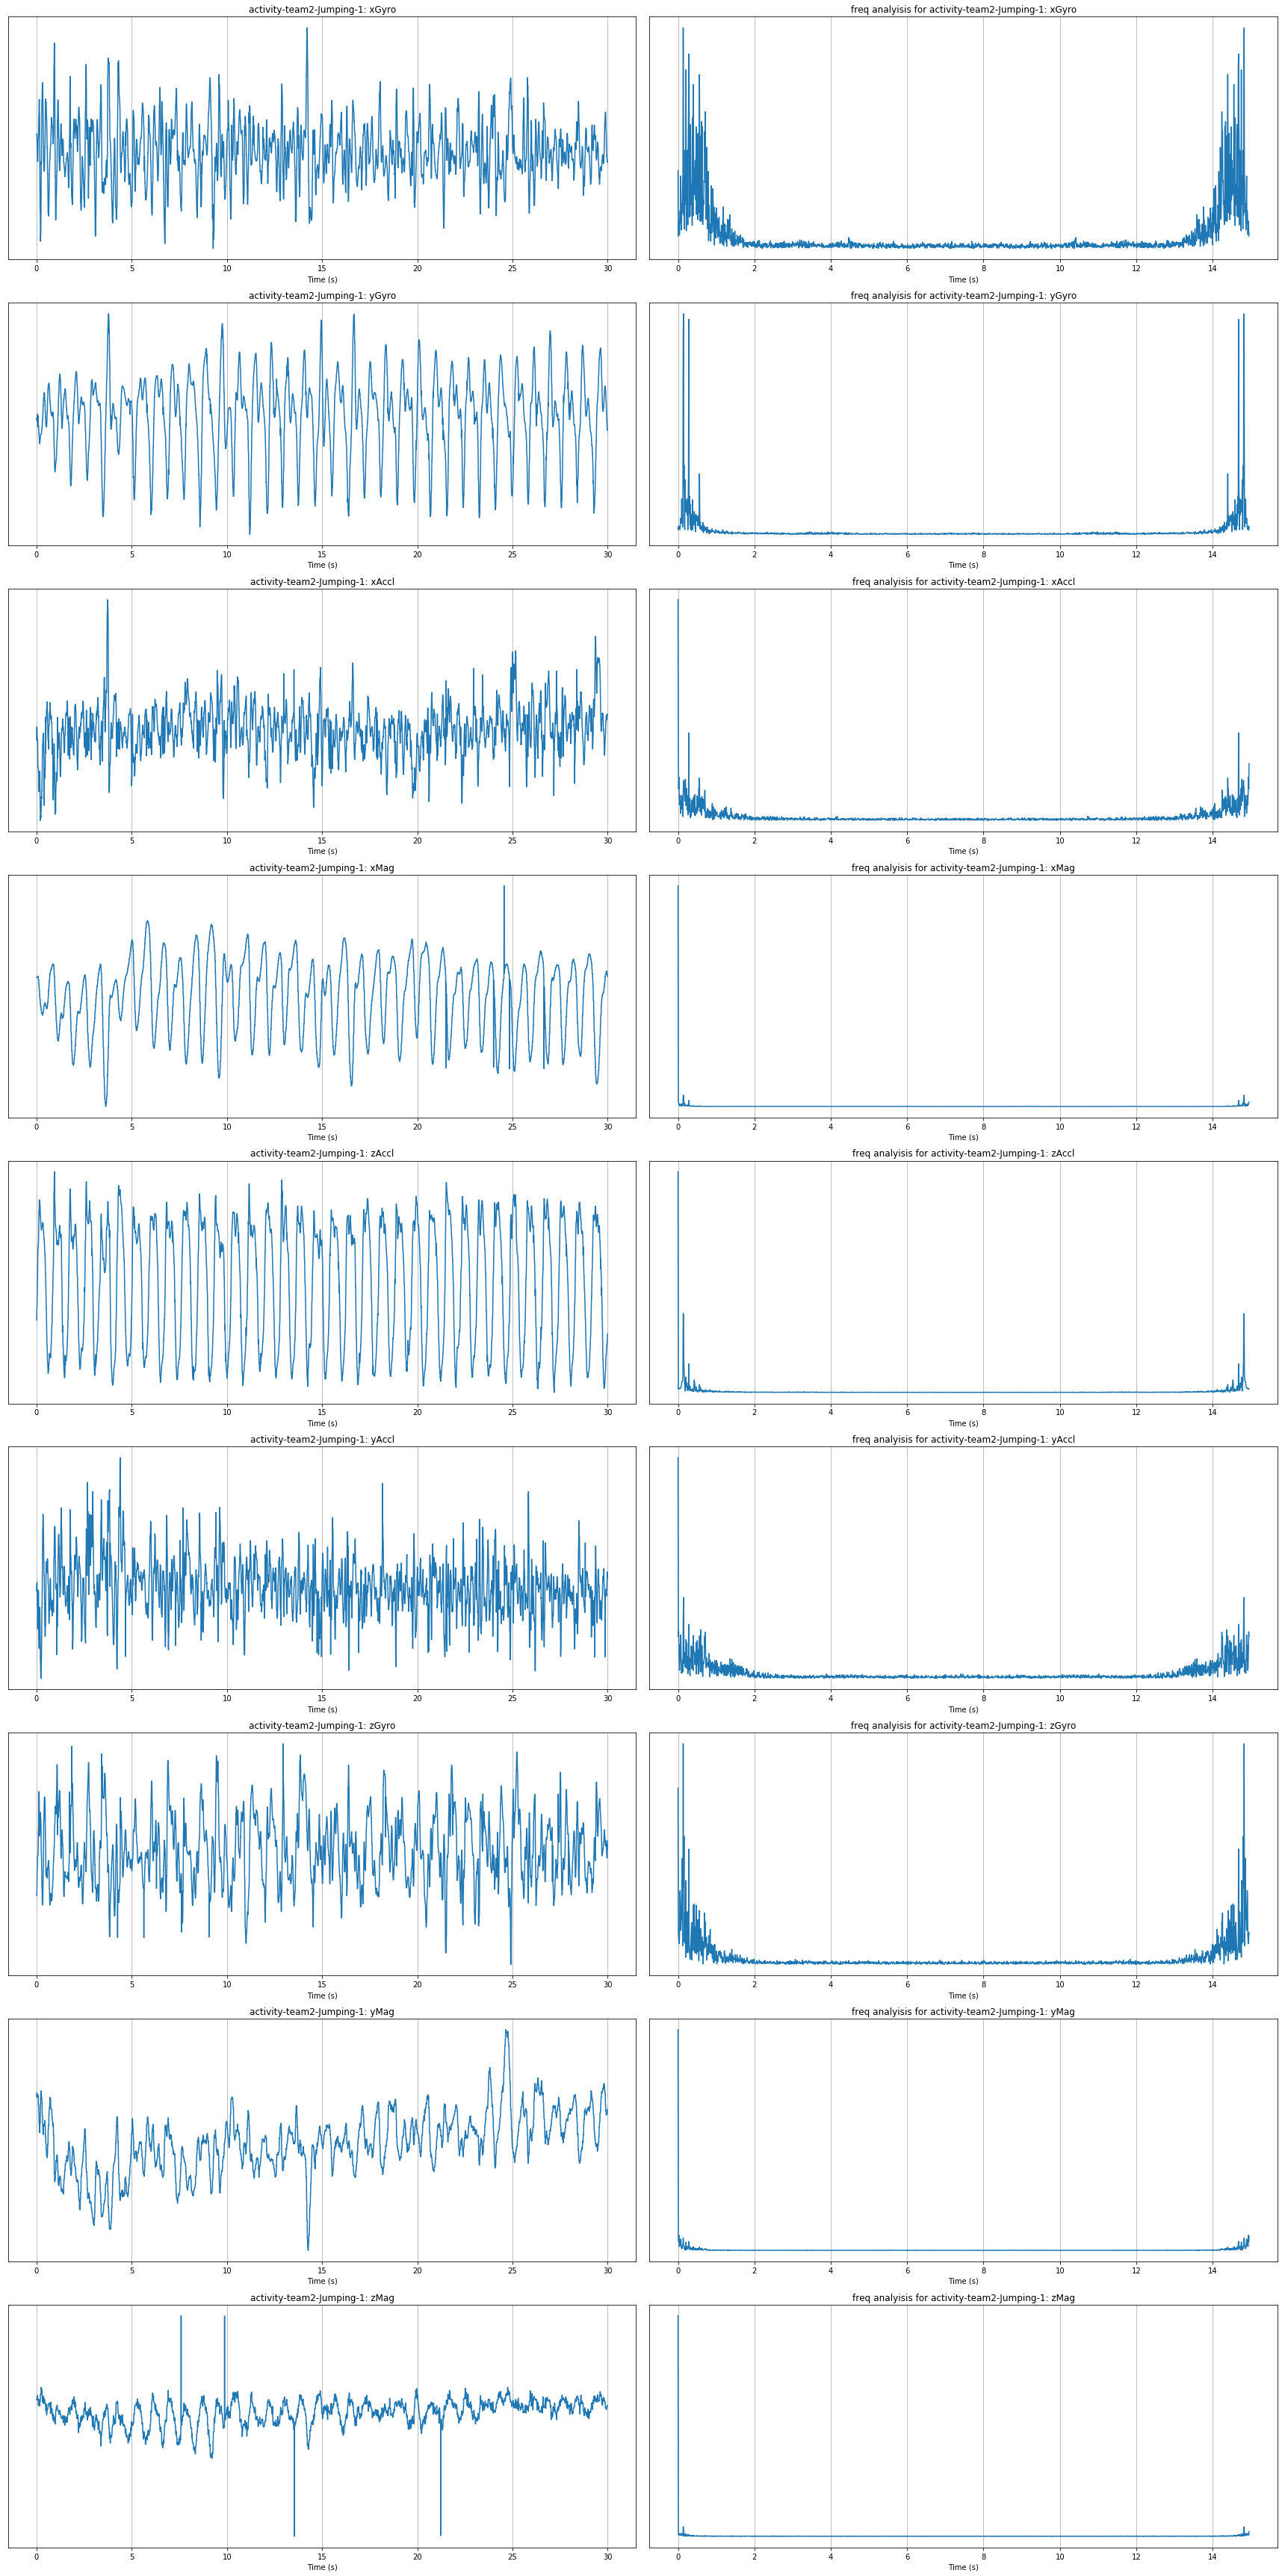

## activity-team2-Walking-1

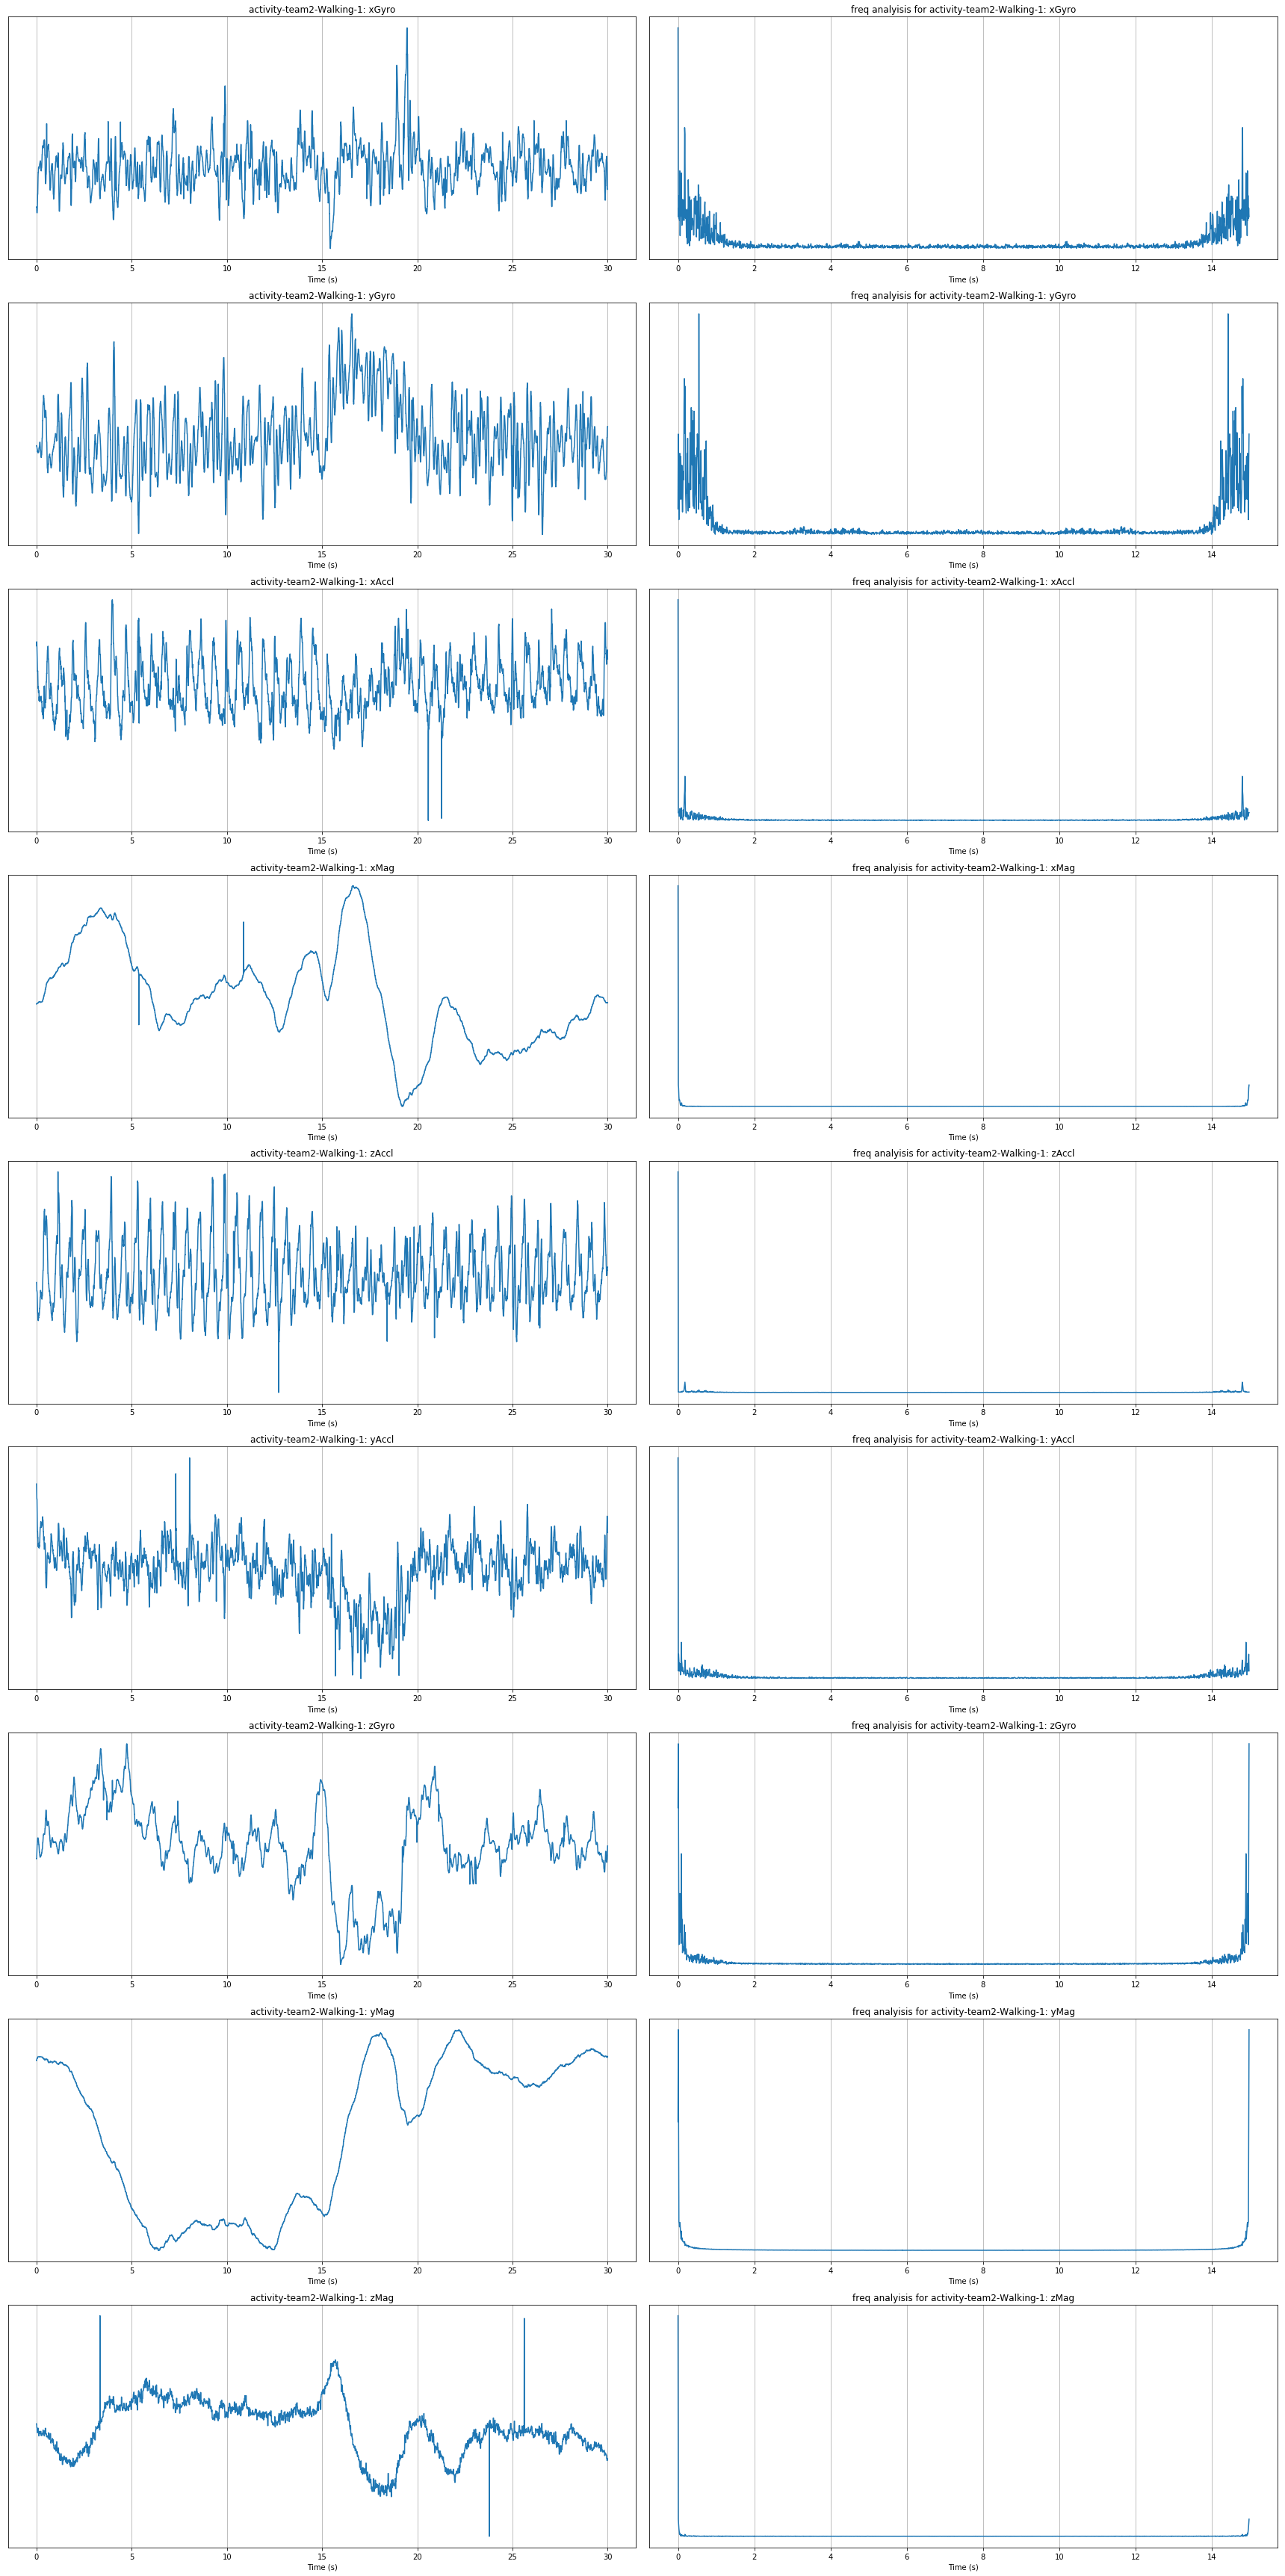

## activity-team2-Walking-0

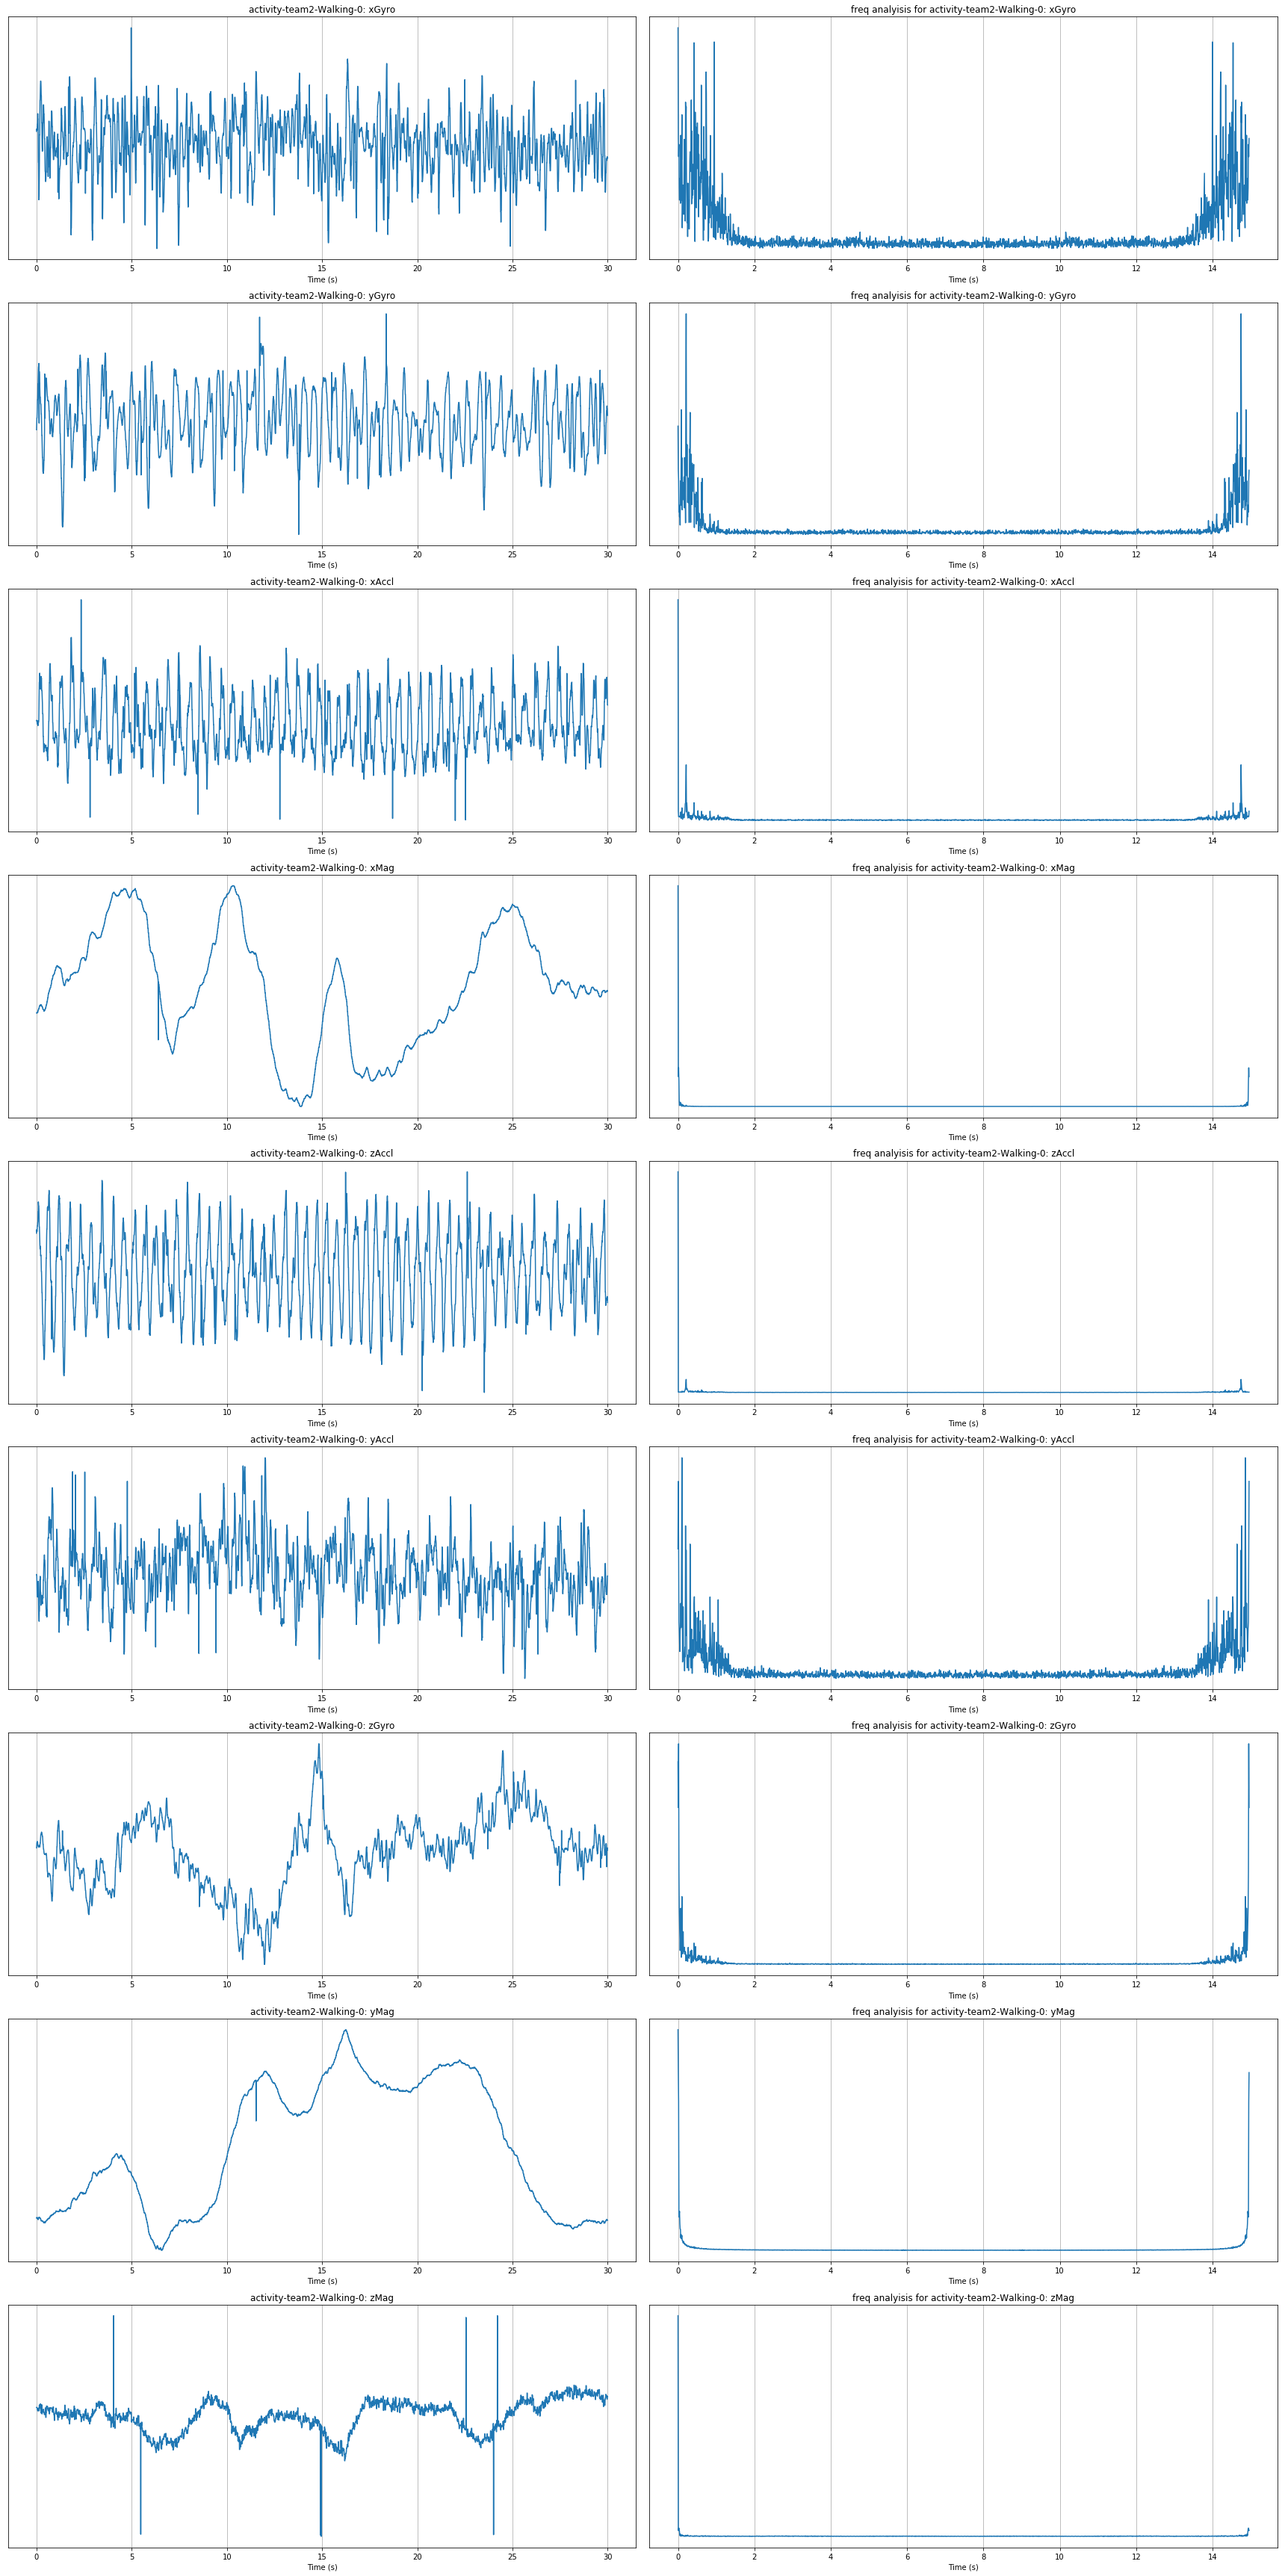

## activity-team2-Standing-1

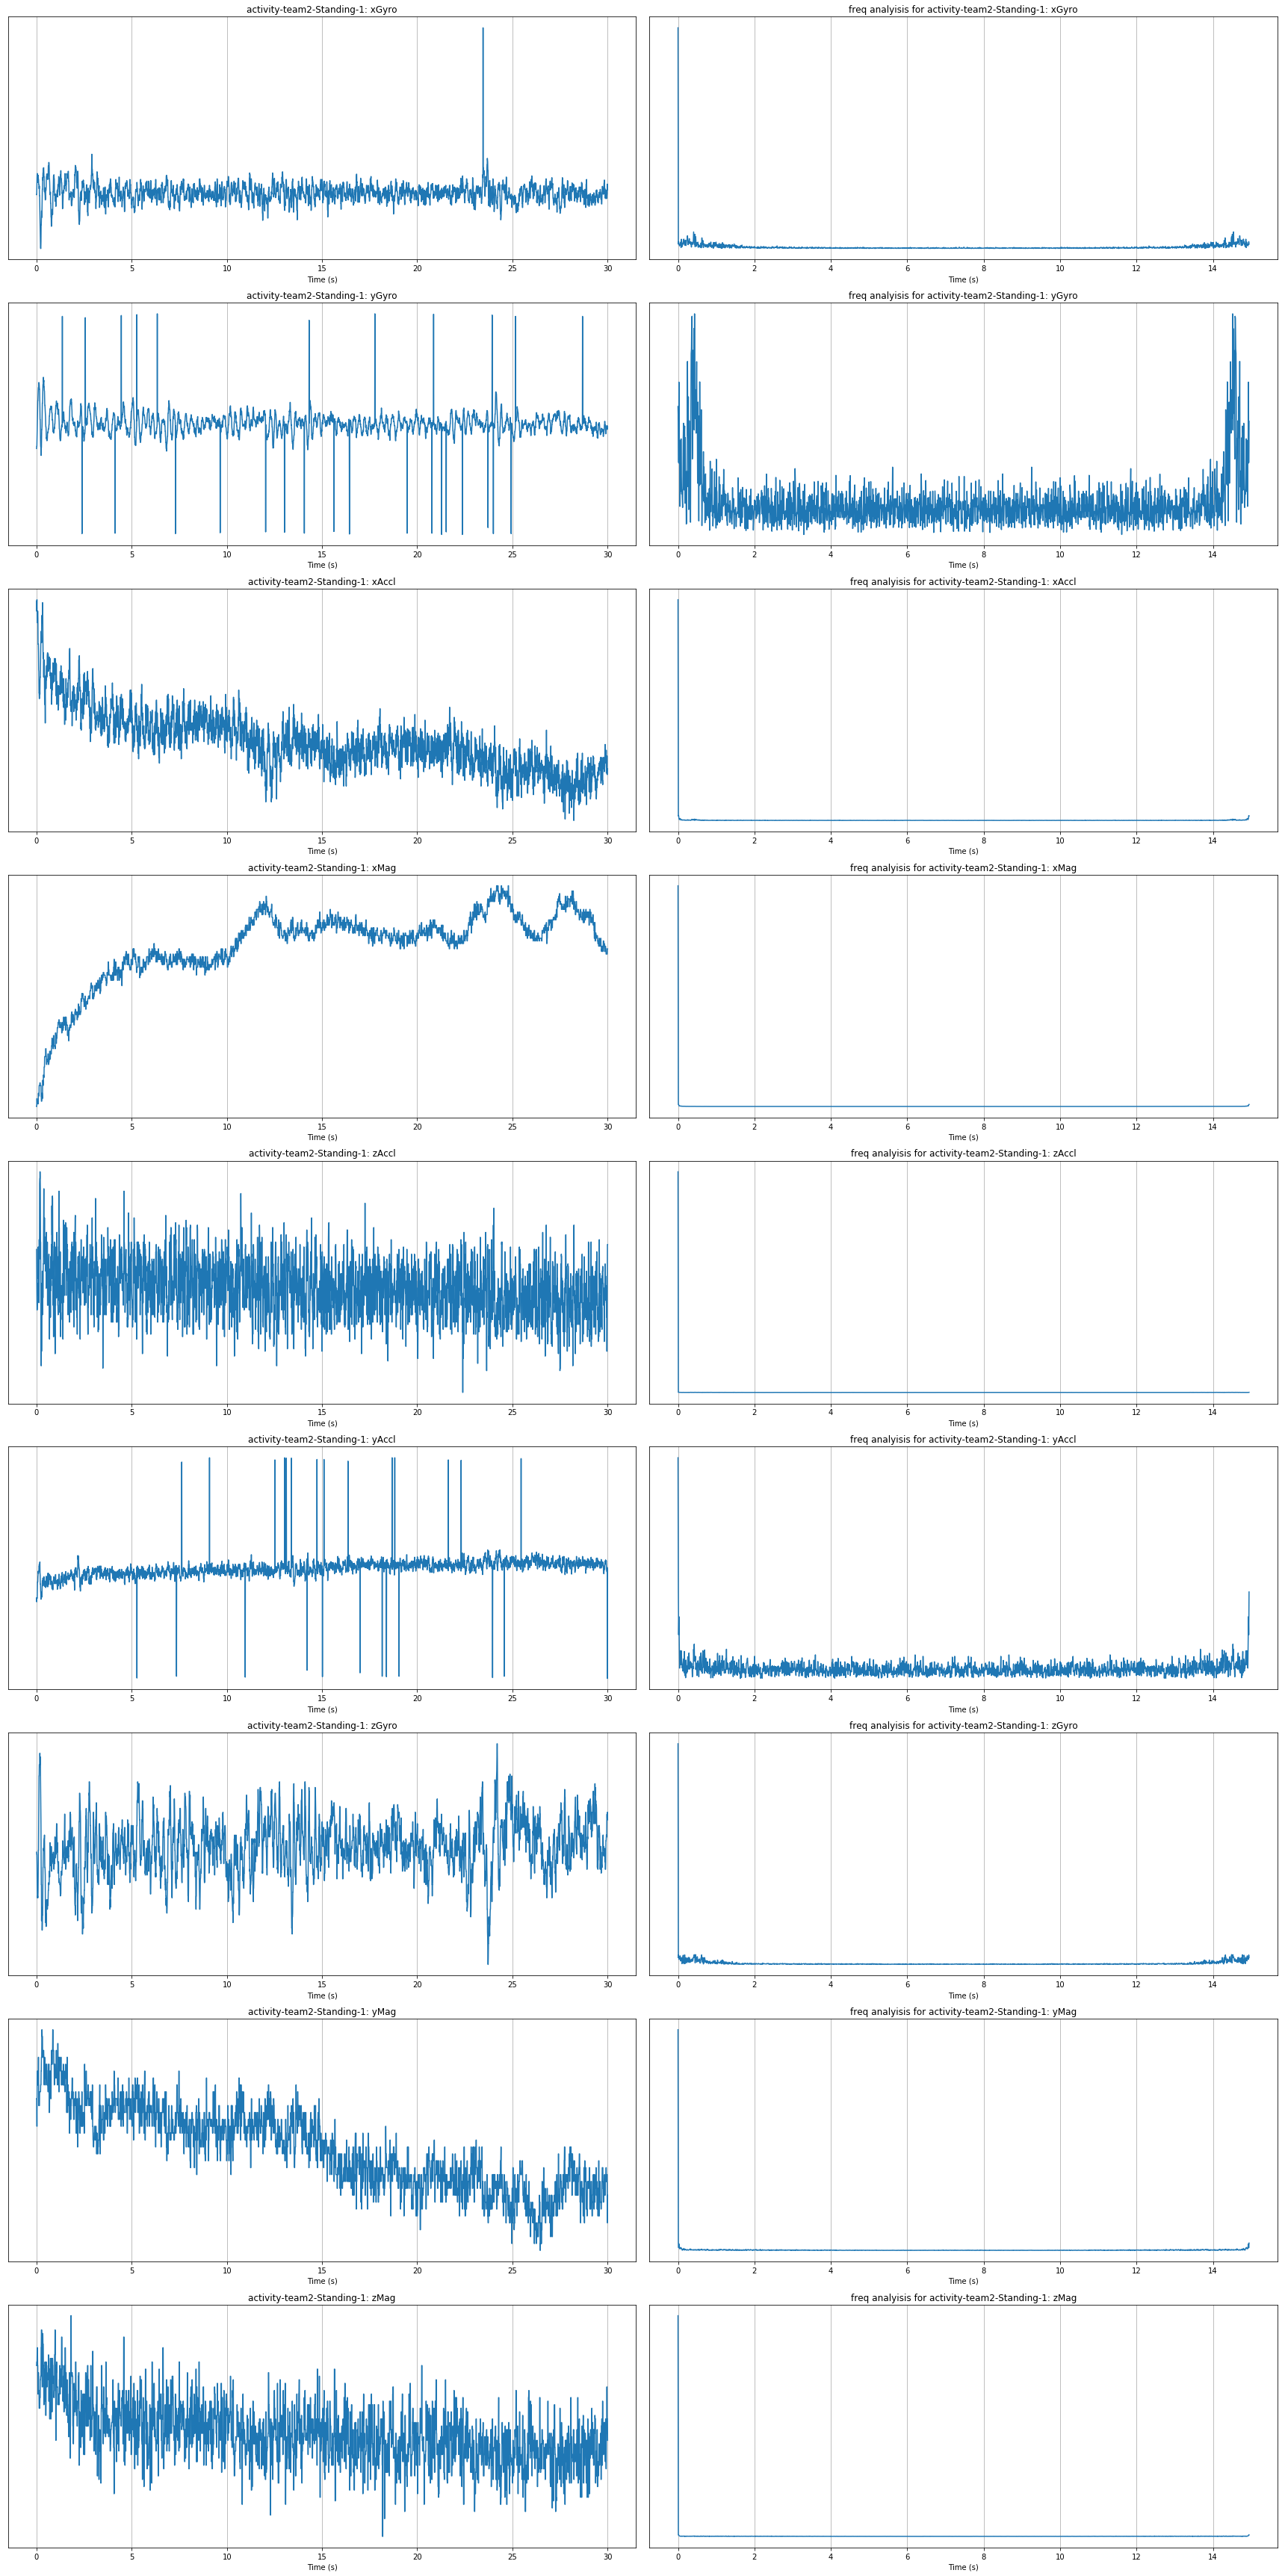

In [192]:
for file in fileDict:
    display(Markdown('## ' + file.split(".")[0]))
    showPlot(file, fileDict[file])